# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [10]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [32]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [13]:
df_dummies = pd.get_dummies(df,columns=['prestige'],drop_first=True)
df_dummies.head()

admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0

#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3, dropping first to avoid multicollinearity

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [ ]:
#cols_to_keep = ['admit', 'gre', 'gpa']
#handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
#print handCalc.head()

In [14]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
df[df['prestige']==1.0]['admit'].value_counts()

1    33
0    28
Name: admit, dtype: int64

#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [17]:
probability=df[df['prestige']==1.0]['admit'].mean()
print "probability=",probability
odds_ratio=probability/(1-probability)
print "odds_ratio=",odds_ratio

probability= 0.540983606557
odds_ratio= 1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [18]:
probability=df[df['prestige']!=1.0]['admit'].mean()
print "probability=",probability
odds_ratio=probability/(1-probability)
print "odds_ratio=",odds_ratio

probability= 0.276785714286
odds_ratio= 0.382716049383


#### 3.3 Calculate the odds ratio

#### 3.4 Write this finding in a sentenance: 

Answer: The odds of graduate admission from a #1 ranked college are higher than the odds of admission from all other schools.

#### 3.5 Print the cross tab for prestige_4

In [19]:
df[df['prestige']==4.0]['admit'].value_counts()

0    55
1    12
Name: admit, dtype: int64

#### 3.6 Calculate the OR 

In [20]:
probability=df[df['prestige']==4.0]['admit'].mean()
print "probability=",probability
odds_ratio=probability/(1-probability)
print "odds_ratio=",odds_ratio

probability= 0.179104477612
odds_ratio= 0.218181818182


#### 3.7 Write this finding in a sentence

Answer: The odds of being admitted from the school with the lowest prestige are lower than the odds of being admitted either from top colleges or all other colleges.

## Part 4. Analysis

In [22]:
# create a clean data frame for the regression
#cols_to_keep = ['admit', 'gre', 'gpa']
#data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data = df_dummies
data.head()

admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0

We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [24]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0      0  380.0  3.61           0.0           1.0           0.0        1.0
1      1  660.0  3.67           0.0           1.0           0.0        1.0
2      1  800.0  4.00           0.0           0.0           0.0        1.0
3      1  640.0  3.19           0.0           0.0           1.0        1.0
4      0  520.0  2.93           0.0           0.0           1.0        1.0

#### 4.1 Set the covariates to a variable called train_cols

In [33]:
train_cols = data.columns[1:]
print train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')


#### 4.2 Fit the model

In [35]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [36]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 Feb 2017   Pseudo R-squ.:                 0.08166
Time:                        22:40:31   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [40]:
#print result.params
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [43]:
#print result.conf_int()
print np.exp(result.conf_int())

                     0         1
gre           1.000074  1.004372
gpa           1.136120  4.183113
prestige_2.0  0.272168  0.942767
prestige_3.0  0.133377  0.515419
prestige_4.0  0.093329  0.479411
intercept     0.002207  0.194440


#### 4.5 Interpret the OR of Prestige_2

Answer: Relative to the top ranked schools (prestige=1) attending a school with prestige=2 decreases the oddds of admission by a factor of 0.506548

#### 4.6 Interpret the OR of GPA

Answer: A unit increase in GPA increases the odds of admission by a factor of 1.136120

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [44]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [53]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [54]:
print len(combos)
combos.columns=['gre', 'gpa', 'prestige', 'intercept']
print combos.head()

400
     gre       gpa  prestige  intercept
0  220.0  2.260000       1.0        1.0
1  220.0  2.260000       2.0        1.0
2  220.0  2.260000       3.0        1.0
3  220.0  2.260000       4.0        1.0
4  220.0  2.453333       1.0        1.0


#### 5.1 Recreate the dummy variables

In [55]:
# recreate the dummy variables
combos_dummies = pd.get_dummies(combos,columns=['prestige'],drop_first=True)
combos_dummies.head()
# keep only what we need for making predictions


gre       gpa  intercept  prestige_2.0  prestige_3.0  prestige_4.0
0  220.0  2.260000        1.0           0.0           0.0           0.0
1  220.0  2.260000        1.0           1.0           0.0           0.0
2  220.0  2.260000        1.0           0.0           1.0           0.0
3  220.0  2.260000        1.0           0.0           0.0           1.0
4  220.0  2.453333        1.0           0.0           0.0           0.0

In [56]:
combos_dummies[train_cols].head()

gre       gpa  prestige_2.0  prestige_3.0  prestige_4.0  intercept
0  220.0  2.260000           0.0           0.0           0.0        1.0
1  220.0  2.260000           1.0           0.0           0.0        1.0
2  220.0  2.260000           0.0           1.0           0.0        1.0
3  220.0  2.260000           0.0           0.0           1.0        1.0
4  220.0  2.453333           0.0           0.0           0.0        1.0

#### 5.2 Make predictions on the enumerated dataset

In [58]:
combos_dummies['admit_pred'] = result.predict(combos_dummies[train_cols])
combos_dummies.tail()

gre       gpa  intercept  prestige_2.0  prestige_3.0  prestige_4.0  \
395  800.0  3.806667        1.0           0.0           0.0           1.0   
396  800.0  4.000000        1.0           0.0           0.0           0.0   
397  800.0  4.000000        1.0           1.0           0.0           0.0   
398  800.0  4.000000        1.0           0.0           1.0           0.0   
399  800.0  4.000000        1.0           0.0           0.0           1.0   

     admit_pred  
395    0.334286  
396    0.734040  
397    0.582995  
398    0.419833  
399    0.368608

#### 5.3 Interpret findings for the last 4 observations

The probability of admission monotonically descreases with decreasing school prestige.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [61]:
combos_dummies['gre'].describe()

count    400.000000
mean     510.000000
std      185.334387
min      220.000000
25%      348.888889
50%      510.000000
75%      671.111111
max      800.000000
Name: gre, dtype: float64

In [67]:
points=np.arange(200,800,step=50)
boxes=[]
for x in points:
    admit = combos_dummies[(combos_dummies['gre']<x+25)&(combos_dummies['gre']>=x-25)]['admit_pred']
    boxes.append(admit)

In [68]:
len(boxes)

12

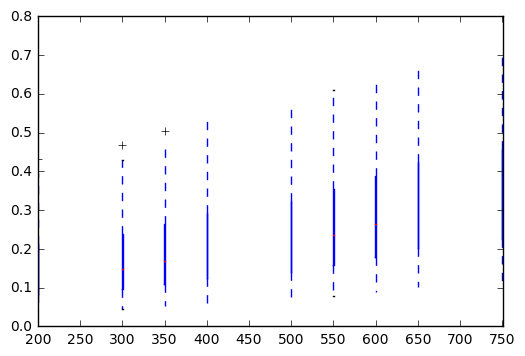

In [72]:
plt.boxplot(boxes,positions=points);

In [60]:
combos_dummies[combos_dummies['gre']==800]['admit_pred'].describe()

count    40.000000
mean      0.378202
std       0.165234
min       0.130762
25%       0.251121
50%       0.355084
75%       0.494706
max       0.734040
Name: admit_pred, dtype: float64

In [73]:
len(combos_dummies[(combos_dummies['gre']<450+25)&(combos_dummies['gre']>=450-25)])

0